In [2]:
from scipy import stats
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### Properties of distributions

In [3]:
X = stats.norm(1, 0.5)

In [4]:
X.mean(), X.std(), X.var(), X.median()

(np.float64(1.0), np.float64(0.5), np.float64(0.25), np.float64(1.0))

In [8]:
# Compute the first 5 moments of the distribution
X_moments = [X.moment(n) for n in range(5)]
X_moments

[np.float64(1.0),
 np.float64(1.0),
 np.float64(1.25),
 np.float64(1.75),
 np.float64(2.6875)]

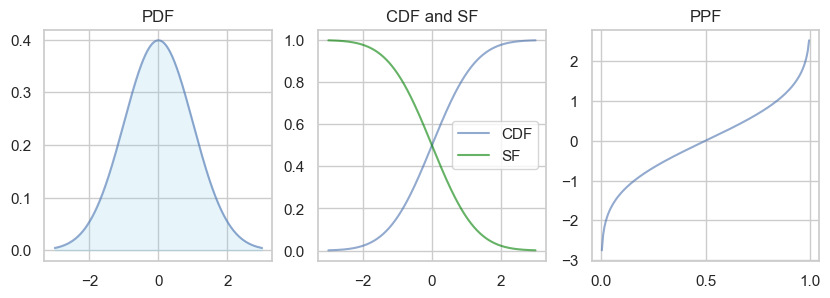

In [30]:
# Make 3 plots: 1) PDF, 2) CDF and SF on the same plot, 3) PPF for a standard normal distribution.
# Plot them horizontally (1, 3) with a size of 15x5.
X = stats.norm()
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
x = np.linspace(-3, 3, 1000)
ax[0].plot(x, X.pdf(x), alpha=0.6)
ax[0].set_title('PDF')
ax[0].fill_between(x, X.pdf(x), alpha=0.2, color='skyblue')
ax[1].plot(x, X.cdf(x), label='CDF', alpha=0.6)
ax[1].plot(x, X.sf(x), label='SF', color='green', alpha=0.6)
ax[1].set_title('CDF and SF')
ax[1].legend()
ax[2].plot(x, X.ppf(x), alpha=0.6)
ax[2].set_title('PPF')
plt.show()



### Generate random values

In [31]:
# Generate a one-dimensional array with ten values using `rvs` method from a standard normal distribution.
X = stats.norm()
X_samples = X.rvs(10)
X_samples

array([ 0.68048557,  0.08182602,  0.3761827 , -0.08757814, -0.20390003,
        0.58914548,  0.61564588, -0.59059041, -0.62295878, -0.08907383])

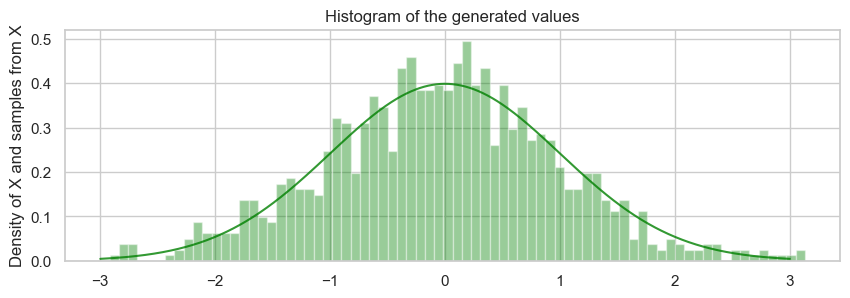

In [39]:
# Generate a one-dimensional array with 1000 values using `rvs` method from a standard normal distribution.
# Plot the histogram of the generated values.  Use 75 bins. 
# Plot the PDF of the standard normal distribution on top of the histogram.
X = stats.norm()
X_samples = X.rvs(1000)
fig, ax = plt.subplots(figsize=(10, 3))
ax.hist(X_samples, bins=75, density=True, alpha=0.4, color='green')
x = np.linspace(-3, 3, 1000)
ax.plot(x, X.pdf(x), color='green', alpha=0.8)
ax.set_title('Histogram of the generated values')
ax.set_ylabel('Density of X and samples from X') 
plt.show()

### Fitting random values

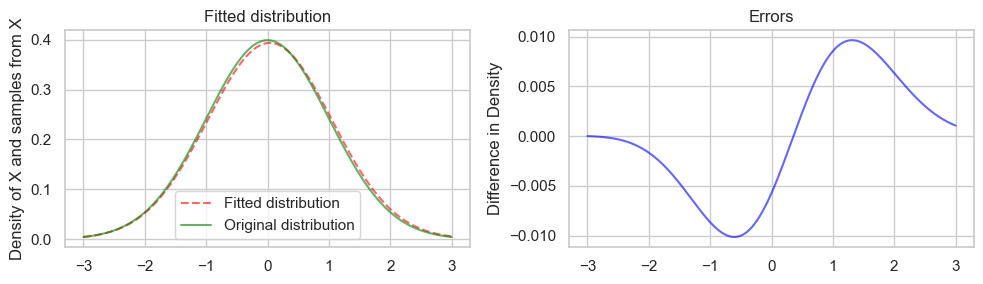

In [58]:
# Generate a one-dimensional array with 1000 values using `rvs` method from a standard normal distribution.
# Slightly modify the generated values. Randomly add or substract a small value from each value in the array.
# Fit a normal distribution to the modified values. 
# Plot the the fitted distribution (not histogram) and the original distribution on the same plot to compare.
X = stats.norm()
X_samples = X.rvs(1000)
X_samples_modified = X_samples + np.random.uniform(-0.1, 0.1, 1000)
X_fitted = stats.norm.fit(X_samples_modified)

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

# Plot the fitted distribution
ax[0].plot(x, stats.norm.pdf(x, *X_fitted), color='red', alpha=0.6, linestyle='--', label='Fitted distribution')
ax[0].plot(x, X.pdf(x), color='green', alpha=0.6, label='Original distribution')
ax[0].set_title('Fitted distribution')
ax[0].set_ylabel('Density of X and samples from X')
ax[0].legend()

# Plot the difference in density
errors = stats.norm.pdf(x, *X_fitted) - X.pdf(x)
ax[1].plot(x, errors, color='blue', alpha=0.6, label='Difference in Density')
ax[1].set_title('Errors')
ax[1].set_ylabel('Difference in Density')

plt.tight_layout()
plt.show()


### Hypothesis Testing